In [105]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [106]:
print(os.listdir("../IdentifyTheApparel"))

['.ipynb_checkpoints', 'AV_IdentifyTheApparel.ipynb', 'sample_submission_I5njJSF.csv', 'submission.csv', 'test_ScVgIM0', 'test_ScVgIM0.zip', 'train_LbELtWX', 'train_LbELtWX.zip']


In [107]:
test = pd.read_csv('../IdentifyTheApparel/test_ScVgIM0/test.csv')
train = pd.read_csv('../IdentifyTheApparel/train_LbELtWX/train.csv')

In [108]:
test_img = []
for img_name in tqdm(test['id']):
    # defining the image path
    image_path = '../IdentifyTheApparel/test_ScVgIM0/test/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

# converting the list to numpy array
test_x = np.array(test_img)
# defining the target
#test_y = test['label'].values
test_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:23<00:00, 119.79it/s]


(10000, 28, 28)

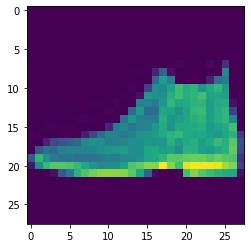

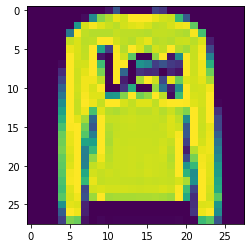

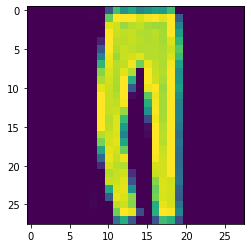

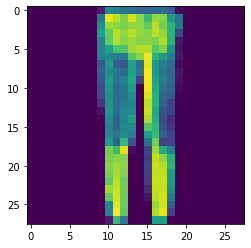

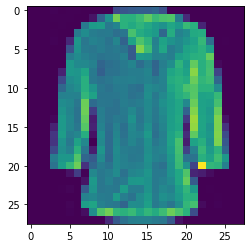

In [109]:
for i in range(0,5):
    plt.imshow(test_x[i])
    plt.show()

In [110]:
train_img = []
for img_name in tqdm(train['id']):
    # defining the image path
    image_path = '../IdentifyTheApparel/train_LbELtWX/train/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
train_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [08:59<00:00, 111.17it/s]


(60000, 28, 28)

In [111]:
#plt.imshow(train_x)
#train_y

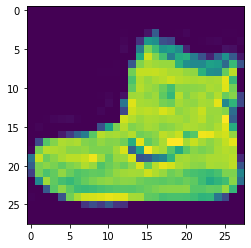

Actual Target :  9


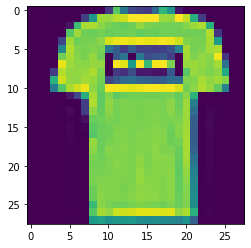

Actual Target :  0


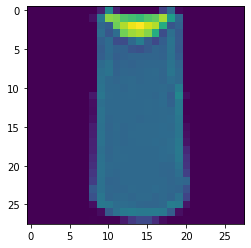

Actual Target :  0


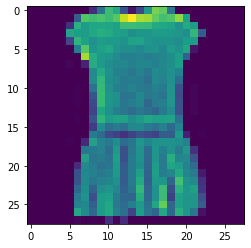

Actual Target :  3


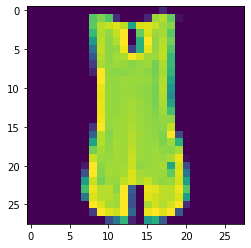

Actual Target :  0


In [112]:
for i in range(0,5):
    plt.imshow(train_x[i])
    plt.show()
    print("Actual Target : ",train_y[i])

In [113]:
train_x = train_x.reshape(train_x.shape[0],-1)

In [114]:
test_x=test_x.reshape(test_x.shape[0],-1)

In [115]:
train_x.shape, test_x.shape

((60000, 784), (10000, 784))

In [116]:
from keras.utils.np_utils import to_categorical

In [117]:
train_y = to_categorical(train_y)

In [118]:
train_y.shape

(60000, 10)

# Model

In [151]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [152]:
model = Sequential()

In [153]:
model.add(Dense(1000, input_shape=(train_x.shape[1],), kernel_initializer='he_normal'))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dense(1000, kernel_initializer='he_normal'))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dense(10, kernel_initializer='he_normal', activation = 'softmax'))

In [154]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1000)              785000    
_________________________________________________________________
batch_normalization_19 (Batc (None, 1000)              4000      
_________________________________________________________________
activation_19 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
batch_normalization_20 (Batc (None, 1000)              4000      
_________________________________________________________________
activation_20 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [155]:
sgd = optimizers.SGD()
losses_obj = losses.categorical_crossentropy
model.compile(optimizer=sgd, loss= losses_obj, metrics=['accuracy'])

In [156]:
history_result = model.fit(train_x,train_y, batch_size=100, validation_split=0.3, epochs = 50, verbose = 1)

Epoch 1/50
420/420 [==============================] - 10s 23ms/step - loss: 0.6063 - accuracy: 0.7923 - val_loss: 1.4842 - val_accuracy: 0.8239
Epoch 2/50
420/420 [==============================] - 9s 20ms/step - loss: 0.4618 - accuracy: 0.8409 - val_loss: 0.4636 - val_accuracy: 0.8395
Epoch 3/50
420/420 [==============================] - 10s 23ms/step - loss: 0.4275 - accuracy: 0.8508 - val_loss: 0.4234 - val_accuracy: 0.8519
Epoch 4/50
420/420 [==============================] - 9s 21ms/step - loss: 0.4073 - accuracy: 0.8593 - val_loss: 0.4113 - val_accuracy: 0.8559
Epoch 5/50
420/420 [==============================] - 9s 21ms/step - loss: 0.3932 - accuracy: 0.8642 - val_loss: 0.3995 - val_accuracy: 0.8607
Epoch 6/50
420/420 [==============================] - 9s 21ms/step - loss: 0.3822 - accuracy: 0.8666 - val_loss: 0.3990 - val_accuracy: 0.8593
Epoch 7/50
420/420 [==============================] - 9s 22ms/step - loss: 0.3707 - accuracy: 0.8700 - val_loss: 0.3897 - val_accuracy: 0.86

In [157]:
test_pred = model.predict(test_x)

In [158]:
test_pred.shape

(10000, 10)

In [159]:
np.argmax(model.predict(test_x),axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [160]:
submission = pd.read_csv('../IdentifyTheApparel/sample_submission_I5njJSF.csv')

In [161]:
submission.columns

Index(['id', 'label'], dtype='object')

In [162]:
submission['label'] = np.argmax(model.predict(test_x),axis=1)

In [163]:
submission.to_csv("submission.csv")

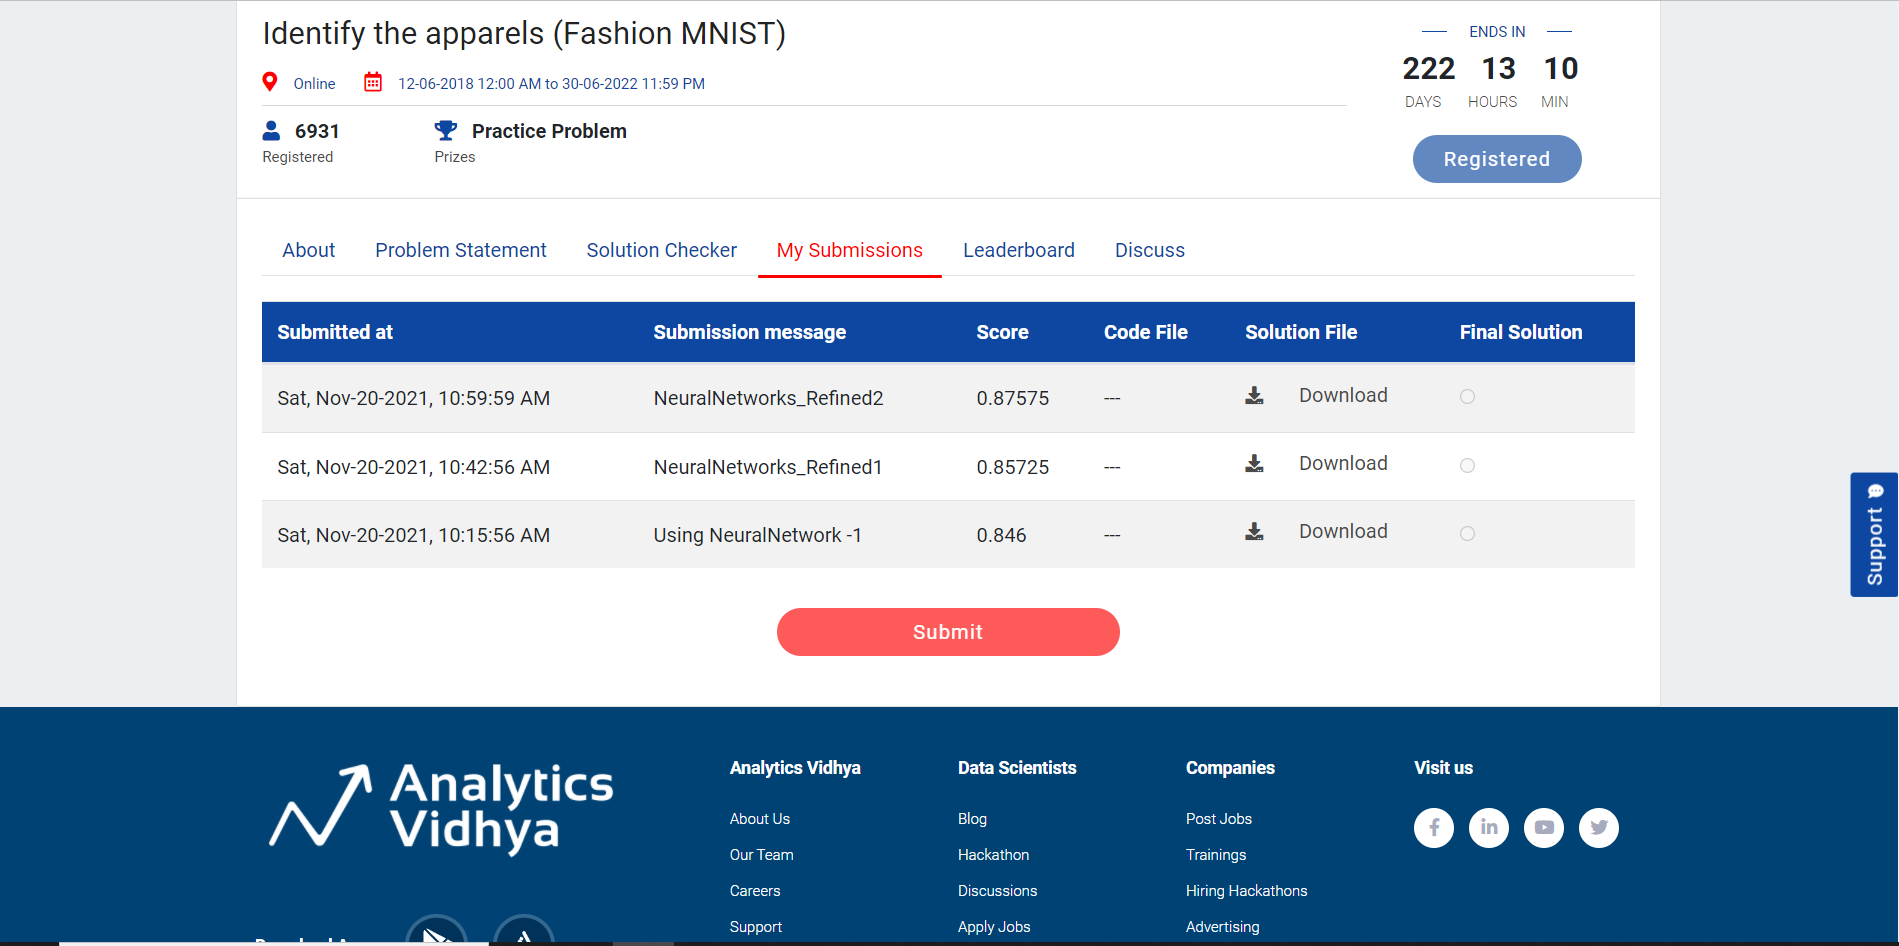

In [165]:
from IPython.display import Image
Image(filename='Capture.PNG')